In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Function to compare two models strictly based on means only
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    # Check if model1 is at least as good as model2 in all metrics
    at_least_as_good = (
        model1["RMSE_mean"] <= model2["RMSE_mean"]
        and model1["MAE_mean"] <= model2["MAE_mean"]
        and model1["MAPE_mean"] <= model2["MAPE_mean"]
        and model1["R2_mean"] >= model2["R2_mean"]
    )

    # Check if model1 is strictly better in at least one metric
    strictly_better_in_one = (
        model1["RMSE_mean"] < model2["RMSE_mean"]
        or model1["MAE_mean"] < model2["MAE_mean"]
        or model1["MAPE_mean"] < model2["MAPE_mean"]
        or model1["R2_mean"] > model2["R2_mean"]
    )

    # Model1 strictly dominates Model2 if it is at least as good in all metrics and
    # strictly better in at least one metric
    return at_least_as_good and strictly_better_in_one

In [3]:
# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1

    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []

    while queue:
        u = queue.popleft()
        topo_order.append(u)

        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)

    return topo_order

Dominating Models: ['Model1']
Non-Dominated Models: ['Model4']
Failing Models: ['Model2', 'Model3']
Models in order of dominance: ['Model1', 'Model4', 'Model2', 'Model3']


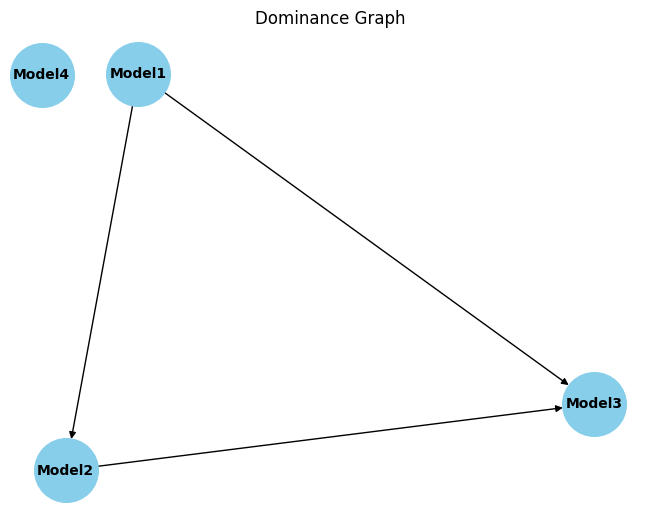

In [4]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    'Model': ['Model1', 'Model2', 'Model3', 'Model4'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}


df = pd.DataFrame(data)



# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominating_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominating_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the dominance graph
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph(dominance_graph)
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G, seed=48, k=1.5)
#pos = nx.kamada_kawai_layout(G)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.4, 0.6])

nx.draw(G, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)
plt.title("Dominance Graph")
plt.show()


Dominating Models: ['A']
Non-Dominated Models: ['D']
Failing Models: ['B', 'C']
Models in order of dominance: ['A', 'D', 'B', 'C']


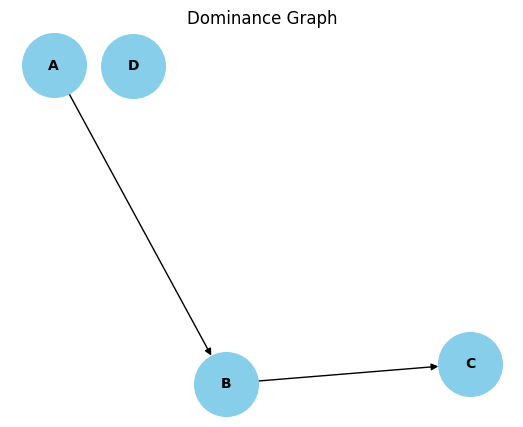

In [5]:

# Sample DataFrame containing the results for each model, including standard deviations
data = {
    #'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    'Model': ['A', 'B', 'C', 'D'],
    'RMSE_mean': [1.5, 2.0, 2.5, 2.1],
    'RMSE_std': [0.2, 0.25, 0.3, 0.25],
    'MAE_mean': [1.0, 1.5, 2.0, 1.4],
    'MAE_std': [0.1, 0.15, 0.2, 0.12],
    'MAPE_mean': [3.0, 4.0, 5.0, 2.8],
    'MAPE_std': [0.5, 0.6, 0.7, 0.4],
    'R2_mean': [0.9, 0.85, 0.8, 0.75],
    'R2_std': [0.05, 0.06, 0.07, 0.08]
}

df = pd.DataFrame(data)

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)


# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)
# pos = nx.kamada_kawai_layout(G)

pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
# pos[1] = pos[0] + 0.02
# pos[2] = pos[1] + 0.05


#pos[1] = pos[1] + np.array([0.0, 0.2])
# pos[2] = pos[2] + np.array([0.01, 0.2])
# pos[2] = np.mean([pos[2], pos[0]], axis=1)
# pos[0] = pos[2] - pos[0]

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)  # 1 row, 2 columns
nx.draw(G_reduced, pos, ax=axes, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
#nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

#plt.title("Reduced Dominance Graph")
plt.title("Dominance Graph")
plt.show()


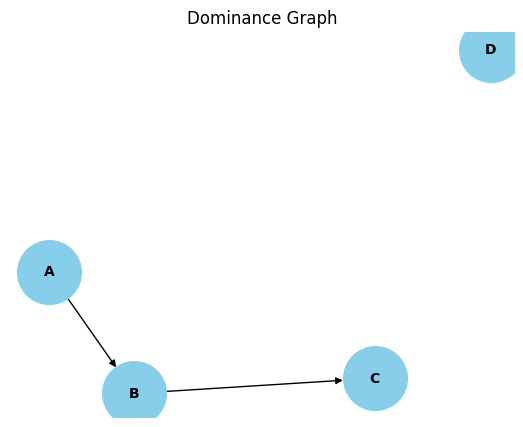

In [9]:
# Generate initial positions
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)

# Diminish the distance from A (index 0) and D (index 3) to B (index 1) by half
# pos[0] = pos[1] + 0.5 * (pos[0] - pos[1])  # A
# pos[3] = pos[1] + 0.5 * (pos[3] - pos[1])  # D
# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
A_old = pos[0]
B_old = pos[1]
D_old = pos[3]

# 1) Move A halfway to B
A_new = A_old + 0.5 * (B_old - A_old)

# 2) Compute the shift
delta = A_new - A_old

# 3) Move D by the same shift
D_new = D_old + delta

# 4) Update positions
pos[0] = A_new
pos[3] = D_new


fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)
nx.draw(
    G_reduced,
    pos,
    ax=axes,
    labels=labels,
    with_labels=True,
    node_size=2100,
    node_color="skyblue",
    font_size=10,
    font_color="black",
    font_weight="bold",
    arrows=True,
)
plt.title("Dominance Graph")
plt.show()

In [7]:
data = {
    #'Model': ['Model A', 'Model B', 'Model C', 'Model D'],
    "Model": ["A", "B", "C", "D"],
    "RMSE_mean": [1.5, 2.0, 2.5, 2.1],
    "RMSE_std": [0.2, 0.25, 0.3, 0.25],
    "MAE_mean": [1.0, 1.5, 2.0, 1.4],
    "MAE_std": [0.1, 0.15, 0.2, 0.12],
    "MAPE_mean": [3.0, 4.0, 5.0, 2.8],
    "MAPE_std": [0.5, 0.6, 0.7, 0.4],
    "R2_mean": [0.9, 0.85, 0.8, 0.75],
    "R2_std": [0.05, 0.06, 0.07, 0.08],
}

df = pd.DataFrame(data)

In [8]:
df[["Model", "RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]

,Model,RMSE_mean,MAE_mean,MAPE_mean,R2_mean
0,A,1.5,1.0,3.0,0.90
1,B,2.0,1.5,4.0,0.85
2,C,2.5,2.0,5.0,0.80
3,D,2.1,1.4,2.8,0.75


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized_metrics = scaler.fit_transform(
    df[["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"]]
)

# Creating a new dataframe with standardized values
standardized_df = pd.DataFrame(
    standardized_metrics,
    columns=["RMSE_mean", "MAE_mean", "MAPE_mean", "R2_mean"],
)

# Summing all metrics and subtracting R2_mean
standardized_df["Result"] = (
    standardized_df[["RMSE_mean", "MAE_mean", "MAPE_mean"]].sum(axis=1)
    - standardized_df["R2_mean"]
)

In [10]:
standardized_df["Model"] = df["Model"]

Dominating Models: ['A']
Non-Dominated Models: []
Failing Models: ['B', 'C', 'D']
Models in order of dominance: ['A', 'B', 'D', 'C']


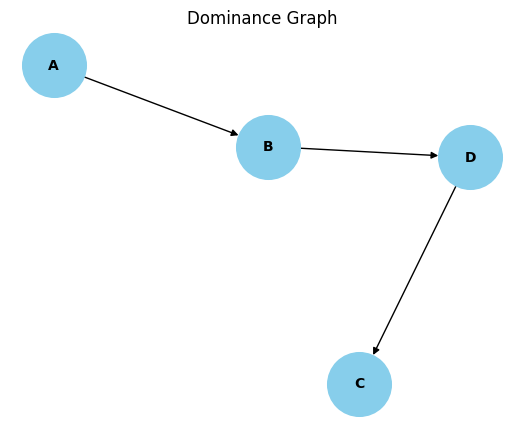

In [11]:
import pandas as pd
import numpy as np
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

df = standardized_df
# Function to compare two models strictly
def strictly_dominates(model1, model2):
    """Return True if model1 strictly dominates model2, False otherwise."""
    return model1['Result'] < model2['Result']

# Create the dominance matrix
n = len(df)
dominance_matrix = np.zeros((n, n), dtype=bool)

for i in range(n):
    for j in range(n):
        if i != j:
            dominance_matrix[i, j] = strictly_dominates(df.iloc[i], df.iloc[j])

# Create the dominance graph
dominance_graph = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if dominance_matrix[i, j]:
            dominance_graph[i].append(j)

# Create the NetworkX graph
G = nx.DiGraph(dominance_graph)

# Apply transitive reduction
G_reduced = nx.transitive_reduction(G)

# Topological Sorting
def topological_sort(graph):
    """Perform topological sorting on the given graph."""
    in_degree = {u: 0 for u in graph}
    for u in graph:
        for v in graph[u]:
            in_degree[v] += 1
    
    queue = deque([u for u in graph if in_degree[u] == 0])
    topo_order = []
    
    while queue:
        u = queue.popleft()
        topo_order.append(u)
        
        for v in graph[u]:
            in_degree[v] -= 1
            if in_degree[v] == 0:
                queue.append(v)
    
    return topo_order

# Get the topological order
topo_order = topological_sort(dominance_graph)

# Categorize models based on dominance
dominates_any = np.any(dominance_matrix, axis=1)
dominated_by_any = np.any(dominance_matrix, axis=0)

dominant_models = [df['Model'].iloc[i] for i in range(n) if dominates_any[i] and not dominated_by_any[i]]
non_dominated_models = [df['Model'].iloc[i] for i in range(n) if not dominates_any[i] and not dominated_by_any[i]]
failing_models = [df['Model'].iloc[i] for i in range(n) if dominated_by_any[i]]

print("Dominating Models:", dominant_models)
print("Non-Dominated Models:", non_dominated_models)
print("Failing Models:", failing_models)

# Map the topological order to the model names
sorted_models = [df['Model'].iloc[i] for i in topo_order]
print("Models in order of dominance:", sorted_models)

# Visualization of the reduced dominance graph
labels = {i: df['Model'].iloc[i] for i in range(n)}
pos = nx.spring_layout(G_reduced, seed=48, k=1.5)
# pos = nx.kamada_kawai_layout(G)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
# pos[1] = pos[0] + 0.02
# pos[2] = pos[1] + 0.05


#pos[1] = pos[1] + np.array([0.0, 0.2])
# pos[2] = pos[2] + np.array([0.01, 0.2])
# pos[2] = np.mean([pos[2], pos[0]], axis=1)
# pos[0] = pos[2] - pos[0]

fig, axes = plt.subplots(1, 1, figsize=(6.5, 5), sharex=False)  # 1 row, 2 columns
nx.draw(G_reduced, pos, ax=axes, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

# pos[3] = np.mean([pos[0], pos[1]], axis=1) + np.array([-0.3, 0.7])
#nx.draw(G_reduced, pos, labels=labels, with_labels=True, node_size=2100, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrows=True)

#plt.title("Reduced Dominance Graph")
plt.title("Dominance Graph")
plt.show()


In [11]:
df

,RMSE_mean,MAE_mean,MAPE_mean,R2_mean,Result
0,-1.473911,-1.333539,-0.797724,1.341641,-4.946814
1,-0.070186,0.070186,0.341882,0.447214,-0.105332
2,1.333539,1.473911,1.481487,-0.447214,4.736151
3,0.210559,-0.210559,-1.025645,-1.341641,0.315996


<IPython.core.display.Javascript object>